In [38]:
from overcooked_ai_py.mdp.overcooked_mdp import Recipe
from itertools import combinations
from copy import deepcopy
from ortools.sat.python import cp_model
Recipe.configure({'onion_value': 1, 'tomato_value': 1})
Recipe.ALL_RECIPES
RECIPES = {}
for recipe in Recipe.ALL_RECIPES:
    RECIPES[recipe] = recipe.value
    #print(recipe.value)
comb = combinations(RECIPES, 6)
print(len(list(deepcopy(comb))))
comb_value = {}
for orders in comb:
    value =0
    for recipe in orders:
        value += recipe.value
    comb_value[orders] = value
comb_value_sorted = {k: v for k, v in sorted(comb_value.items(), key=lambda item: item[1])}
#print(comb_value_sorted)
selected_orders = [orders for orders, value in comb_value_sorted.items() if value == 14] #170 157 178 183 186 191
former_value = 0
count = 0
for key, value in comb_value_sorted.items():
    if value != former_value :
        print("n_ingredients",former_value, "n_recipes", count)
        former_value = value
        count = 1
    else : 
        count += 1 
        
for order in selected_orders :
    print([{"ingredients" : list(ingredients)
           } for ingredients in order])
        


84
n_ingredients 0 n_recipes 0
n_ingredients 11 n_recipes 4
n_ingredients 12 n_recipes 18
n_ingredients 13 n_recipes 24
n_ingredients 14 n_recipes 25
n_ingredients 15 n_recipes 10
[{'ingredients': ['tomato']}, {'ingredients': ['onion', 'onion']}, {'ingredients': ['onion', 'onion', 'onion']}, {'ingredients': ['tomato', 'tomato', 'tomato']}, {'ingredients': ['onion', 'onion', 'tomato']}, {'ingredients': ['onion', 'tomato']}]
[{'ingredients': ['tomato']}, {'ingredients': ['onion', 'onion']}, {'ingredients': ['onion', 'onion', 'onion']}, {'ingredients': ['tomato', 'tomato', 'tomato']}, {'ingredients': ['onion', 'onion', 'tomato']}, {'ingredients': ['tomato', 'tomato']}]
[{'ingredients': ['tomato']}, {'ingredients': ['onion', 'onion']}, {'ingredients': ['onion', 'onion', 'onion']}, {'ingredients': ['tomato', 'tomato', 'tomato']}, {'ingredients': ['onion', 'tomato']}, {'ingredients': ['onion', 'tomato', 'tomato']}]
[{'ingredients': ['tomato']}, {'ingredients': ['onion', 'onion']}, {'ingredie

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1
[[0. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 3. 2. 3. 2. 3. 2. 3. 3.
  3.]
 [1. 0. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 3. 2. 3. 2. 3. 2. 2. 3. 3.
  3.]
 [1. 2. 0. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 3. 1. 2. 2. 3. 2. 3. 3. 2. 3.
  3.]
 [2. 1. 1. 0. 2. 1. 2. 1. 2. 2. 1. 2. 2. 3. 2. 2. 1. 3. 2. 3. 2. 3. 2. 3.
  3.]
 [1. 2. 1. 2. 0. 1. 1. 2. 2. 2. 2. 1. 2. 2. 3. 2. 3. 1. 2. 2. 3. 3. 3. 2.
  3.]
 [2. 1. 2. 1. 1. 0. 2. 1. 2. 2. 2. 1. 2. 3. 2. 3. 2. 2. 1. 3. 2. 3. 3. 2.
  3.]
 [1. 2. 1. 2. 1. 2. 0. 1. 2. 2. 2. 2. 1. 2. 3. 2. 3. 2. 3. 1. 2. 3. 3. 3.
  2.]
 [2. 1. 2. 1. 2. 1. 1. 0. 2. 2. 2. 2. 1. 3. 2. 3. 2. 3. 2. 2. 1. 3. 3. 3.
  2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 0. 2. 1. 1. 1. 2. 2. 3. 3. 3. 3. 3. 3. 1. 2. 2.
  2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2.]
 [2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 0. 1. 1. 3. 3. 2. 2. 3. 3. 3. 3. 2. 1. 2.
  2.]
 [2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1. 0. 1. 3. 3. 3. 3. 2. 2. 3. 3. 2. 2. 1.
  2.]
 [2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 

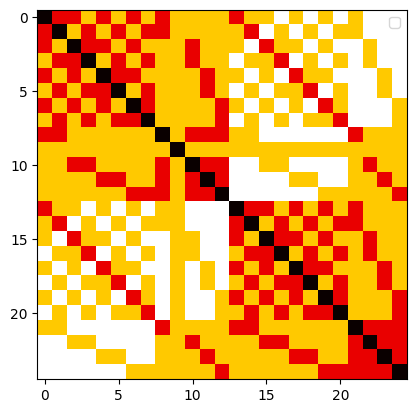

In [39]:
import numpy as np
import matplotlib.pyplot as plt
#print(selected_orders)
print(len(set(selected_orders[0]) - set(selected_orders[2])))
repetitions = np.zeros((len(selected_orders),len(selected_orders)))
for i in range(len(selected_orders)):
    for j in range(len(selected_orders)):
        repetitions[i,j] = len(set(selected_orders[i]) - set(selected_orders[j]))
print(repetitions)
plt.imshow(repetitions, cmap='hot', interpolation='nearest')
plt.legend()
plt.show()

In [40]:
all_possible_combinations = list(combinations(range(len(selected_orders)), 5))
print(len(all_possible_combinations))
all_combinations_diff = []
for comb in all_possible_combinations:
    all_repet = 0
    for i in comb:
        for j in comb:
            if j>i:
                all_repet += repetitions[i,j]
    all_combinations_diff.append(all_repet)

53130


In [49]:
print(max(all_combinations_diff))
max_difference = np.where(all_combinations_repet == max(all_combinations_repet))[0]
selected_combination_index = max_difference[int(len(max_difference)/2)]
print(selected_combination_index)
selected_combination = list(all_possible_combinations)[selected_combination_index]
print(selected_combination)
selected_recipes = []
for index in selected_combination:
    print(index)
    selected_recipes.append(selected_orders[index])
    print(selected_orders[index])

23.0
24630
(2, 8, 11, 13, 20)
2
(('tomato',), ('onion', 'onion'), ('onion', 'onion', 'onion'), ('tomato', 'tomato', 'tomato'), ('onion', 'tomato'), ('onion', 'tomato', 'tomato'))
8
(('tomato',), ('onion', 'onion', 'onion'), ('tomato', 'tomato', 'tomato'), ('onion', 'onion', 'tomato'), ('onion', 'tomato'), ('tomato', 'tomato'))
11
(('tomato',), ('onion', 'onion', 'onion'), ('onion', 'onion', 'tomato'), ('onion', 'tomato'), ('onion', 'tomato', 'tomato'), ('tomato', 'tomato'))
13
(('onion', 'onion'), ('onion', 'onion', 'onion'), ('tomato', 'tomato', 'tomato'), ('onion', 'onion', 'tomato'), ('onion', 'tomato'), ('onion',))
20
(('onion', 'onion'), ('tomato', 'tomato', 'tomato'), ('onion', 'onion', 'tomato'), ('onion', 'tomato', 'tomato'), ('tomato', 'tomato'), ('onion',))


In [50]:
for order in selected_recipes :
    print([{"ingredients" : list(ingredients)
           } for ingredients in order])

[{'ingredients': ['tomato']}, {'ingredients': ['onion', 'onion']}, {'ingredients': ['onion', 'onion', 'onion']}, {'ingredients': ['tomato', 'tomato', 'tomato']}, {'ingredients': ['onion', 'tomato']}, {'ingredients': ['onion', 'tomato', 'tomato']}]
[{'ingredients': ['tomato']}, {'ingredients': ['onion', 'onion', 'onion']}, {'ingredients': ['tomato', 'tomato', 'tomato']}, {'ingredients': ['onion', 'onion', 'tomato']}, {'ingredients': ['onion', 'tomato']}, {'ingredients': ['tomato', 'tomato']}]
[{'ingredients': ['tomato']}, {'ingredients': ['onion', 'onion', 'onion']}, {'ingredients': ['onion', 'onion', 'tomato']}, {'ingredients': ['onion', 'tomato']}, {'ingredients': ['onion', 'tomato', 'tomato']}, {'ingredients': ['tomato', 'tomato']}]
[{'ingredients': ['onion', 'onion']}, {'ingredients': ['onion', 'onion', 'onion']}, {'ingredients': ['tomato', 'tomato', 'tomato']}, {'ingredients': ['onion', 'onion', 'tomato']}, {'ingredients': ['onion', 'tomato']}, {'ingredients': ['onion']}]
[{'ingred